# Forward Euler family

In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
def exact_solution(t):
    uExact=[2*cos(t),2*sin(t)]
    vExact=[-2*sin(t),2*cos(t)]
    return uExact,vExact

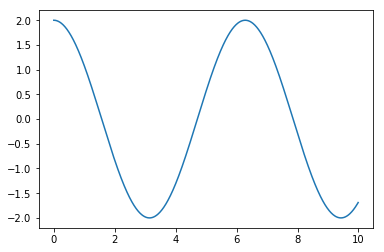

In [32]:
h=.01
tInitial,tFinal=0,10
tExact=arange(tInitial,tFinal,h)
uExact=zeros((len(tExact),2))
vExact=zeros((len(tExact),2))
xExact=zeros(len(tExact))
for i in range (len(tExact)):
    uExact[i],vExact[i]=exact_solution(tExact[i])
    xExact[i]=uExact[i,0]
plot(tExact,xExact)

# A simple Ode solver

In [20]:
def my_ODE_solver(uo,tInitial,tFinal,deltaT,gamma):
    time=arange(tInitial,tFinal+deltaT,deltaT)
    nSteps=len(time)
    u=zeros((nSteps,2))
    v=zeros((nSteps,2))
    u[0]=uo
    v[0]=[0,2]
    for i in range(nSteps-1):
        v[i+1,0] = (-u[i,1]-deltaT*(1-gamma)*v[i,1]-deltaT*gamma*u[i,0]-(deltaT**2)*gamma*(1-gamma)*v[i,0])
        #v[i+1,0] = (-u[i,1]-deltaT*gamma*u[i,0])
        v[i+1,1]=(-deltaT*gamma*u[i,1]-(deltaT**2)*gamma*(1-gamma)*v[i,1]+u[i,0]+deltaT*(1-gamma)*v[i,0])
        #v[i+1,1]=(-deltaT*gamma*u[i,1]+u[i,0])
        u[i+1,0] =u[i,0]+deltaT*(1-gamma)*v[i,0]+gamma*v[i+1,0]
        u[i+1,1]=u[i,1]+deltaT*(1-gamma)*v[i,1]+gamma*v[i+1,1]
    return time,u,v


In [49]:
uo=[2,0]
tInitial,tFinal=0,10
deltaT1=.01
gamma=1
tB,uB,vF=my_ODE_solver(uo,tInitial,tFinal,deltaT1,gamma)
print(tB)
time=arange(tInitial,tFinal+deltaT1,deltaT1)
nSteps=len(time)
r=zeros(nSteps)
for i in range (nSteps):
    r[i]=uB[i,0]
print(r)
#print(len(tB))
#print(len(uB))
gamma=0
deltaT2=.001
tF,uF,vF=my_ODE_solver(uo,tInitial,tFinal,deltaT2,gamma)
print(tF)


[ 0.    0.01  0.02 ...  9.98  9.99 10.  ]
[ 2.00000000e+000  1.98000000e+000 -3.98000000e-002 ... -2.12669021e+148
 -1.44139442e+148  1.35709833e+148]
[0.000e+00 1.000e-03 2.000e-03 ... 9.998e+00 9.999e+00 1.000e+01]


Text(0,0.5,'u(t)')

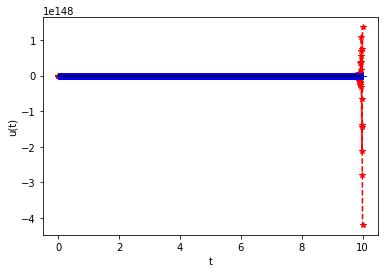

In [50]:
plot(tB,uB,'r*--')
plot(tF,uF,'b+--')
plot(tExact,xExact,'k')
xlabel('t')
ylabel('u(t)')
#legend(["backward","forward","exact"])

# order of convergence

In [ ]:
u=zeros((2,2))
uo=[2,3]
print(u)
u[0]=uo
print(u)

In [ ]:
for i in range (3):
    c=i+1
    print(c)